# ML Project Notebook report

## 1. Understanding and plotting the data
In the first part of this exercise we will use `pandas` DataFrames to store and manipulate the data and use `seaborn` to produce nice visualizations of the data.

The point of this part is to handle the data to get to know the dataset better.

The Data ProQDock.csv is taken from the following piece of literature: https://academic.oup.com/bioinformatics/article/32/12/i262/2288786

The data attributes are used to find correct protein-portein models and are listed as follows within the above mentionned paper in the Training features section:
- rGb: Residue Given burial. Relative solvant accessibility of the protein amino acids. Values range around 0.059 (+- 0.022)
- nBSA: Normalized buried surface area. It measures the fraction of exposed surface area buried upon association
- Fintres: Fraction of residues buried at the interface
- Sc: Shape Complementarity at the interface
- Ec: Electrostatic Complementarity at the interface
- ProQ: Protein quality predictor score
- Isc: Rosetta energy at the interface
- rTs: Roseta total energy
- Erep: Rosetta repulsive term
- Etmr: Rosetta total ernergy minus repulsive
- CPM: Joint Conditional Probability of Sc, EC given nBSA. CPM is the joint conditional probability of finding its interface within a certain range of Sc and EC given its size (nBSA)
- Ld: Link Density at the interface
- CPscore: Contact Preference score

As presented in the paper, the target function or benchmark is also part of our dataset and lists the following properties:
- DockQ: Score of quality for a protein-protein docking model
- DockQ-binary: Applied threshold on the DockQ score reflecting no similarity or perfect similarity scores
- ProQDock: Predicted DockQ protein docking quality score
- zrank and zrank2: All atom energy terms. Non bonded energy terms based (Coulomb, Van der Waals, desolvation)
- ProQDockZ: External energy term. Hybrid method combining ProQDock and Zrank.

Finally here, 'cv' represents the cross validation batched used initally in our dataset.






In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train=pd.read_csv('ProQDock.csv')
train

,Model,rGb,nBSA,Fintres,Sc,EC,ProQ,zrank,zrank2,Isc,...,Erep,Etmr,CPM,Ld,CPscore,DockQ,DockQ-Binary,ProQDock,ProQDockZ,cv
0,T50-1,0.035,0.034,0.106,0.571,0.072,0.682,0.611,0.657,1.000,...,0.998,0.400,0.723,0.114,0.135,0.01262,0,0.296446,0.296439,5
1,T50-2,0.033,0.036,0.124,0.579,-0.128,0.703,0.633,0.671,1.000,...,0.998,0.487,0.695,0.088,0.112,0.01464,0,0.234311,0.220123,5
2,T50-3,0.042,0.027,0.088,0.776,0.434,0.698,0.536,0.452,0.464,...,0.611,0.345,0.857,0.146,0.167,0.01067,0,0.152381,0.225628,5
3,T50-4,0.032,0.032,0.118,0.514,0.458,0.640,0.579,0.534,0.490,...,0.406,0.911,0.735,0.101,0.133,0.01302,0,0.126823,0.134728,5
4,T50-5,0.040,0.029,0.102,0.336,0.172,0.708,0.589,0.839,1.000,...,1.000,0.419,0.451,0.097,0.113,0.01199,0,0.295767,0.301145,5
5,T50-6,0.046,0.030,0.104,0.375,-0.084,0.710,0.612,0.711,1.000,...,1.000,0.417,0.372,0.112,0.266,0.30721,1,0.237555,0.277879,5
6,T50-7,0.043,0.027,0.090,0.602,0.429,0.746,0.633,0.584,0.784,...,0.647,0.381,0.799,0.122,0.123,0.37010,1,0.131572,0.125022,5
7,T50-8,0.041,0.014,0.058,0.575,0.051,0.715,0.622,0.682,1.000,...,1.000,0.421,0.723,0.165,0.116,0.01421,0,0.253425,0.278002,5
8,T50-9,0.041,0.037,0.106,0.377,-0.287,0.683,0.687,0.997,1.000,...,1.000,0.491,0.289,0.098,0.142,0.00777,0,0.183456,0.125676,5
9,T50-10,0.045,0.020,0.082,0.552,0.065,0.714,0.639,0.655,0.527,...,0.982,0.414,0.723,0.134,0.302,0.07302,0,0.378346,0.405764,5


Now, we can plot some of the columns containing continuous values to visualize the distributions.

rTs mean: 0.5602546178969766
tail rTs mean: 0.4060517957694497
DockQ mean: 0.05342665370177128
DockQ std: 0.13084898615761434
ProQDock mean: 0.1529110643090434
ProQDock std: 0.16285711061293873


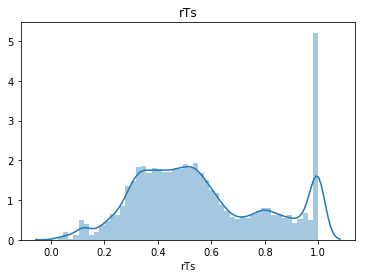

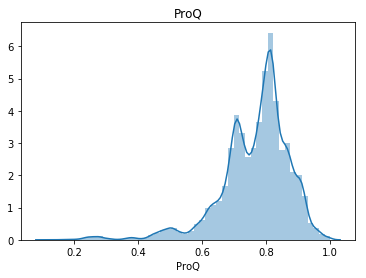

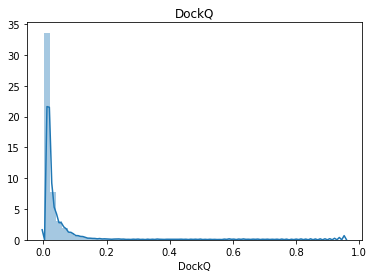

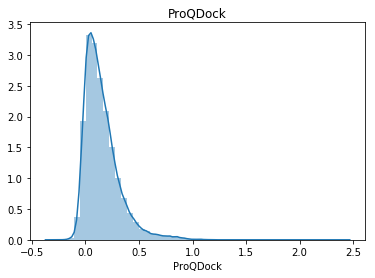

In [2]:
plt.clf()
sns.distplot(train['rTs'])
import numpy as np
estimated_rows=(train['rTs']>0.6) & (train['rTs']<=1.0)
print("rTs mean: " + str(np.mean(train['rTs'])))
print("tail rTs mean: " + str(np.mean(train[~estimated_rows]['rTs'])))
print("DockQ mean: " + str(np.mean(train['DockQ'])))
print("DockQ std: " + str(np.std(train['DockQ'])))
print("ProQDock mean: " + str(np.mean(train['ProQDock'])))
print("ProQDock std: " + str(np.std(train['ProQDock'])))
plt.title('rTs')
plt.show()

sns.distplot(train['ProQ'].dropna())
plt.title('ProQ')
plt.show()

sns.distplot(train['DockQ'].dropna())
plt.title('DockQ')
plt.show()

sns.distplot(train['ProQDock'].dropna())
plt.title('ProQDock')
plt.show()

It is then possible to sort the data to find the proteins with the best arelative solvent accessibility residues using rGb attribute, or the best predicted ProQDock score using ProQDock atrtibute. Finally we can select the categorical DockQ-Binary score and sort in ascending mode to get the minimun value for the binary threshold.

In [3]:
train.sort_values('rGb',ascending=False)[:10]
train.sort_values('ProQDock',ascending=False)[:10]
train.loc[(train['DockQ-Binary'] == 1)].sort_values('DockQ',ascending=True)[:10]

,Model,rGb,nBSA,Fintres,Sc,EC,ProQ,zrank,zrank2,Isc,...,Erep,Etmr,CPM,Ld,CPscore,DockQ,DockQ-Binary,ProQDock,ProQDockZ,cv
30928,D2OOB-a88d,0.048,0.062,0.366,0.778,-0.139,0.580,0.362,0.283,0.879,...,0.445,0.784,0.703,0.173,0.172,0.14680,1,0.043639,0.026873,4
30546,D2OOB-a103a,0.056,0.060,0.380,0.539,0.005,0.604,0.406,0.369,0.873,...,0.456,0.640,0.434,0.199,0.158,0.14853,1,0.089383,0.073719,4
65988,D1I9R-a91a,0.022,0.030,0.151,0.642,0.158,0.820,0.596,0.635,0.260,...,0.525,0.606,0.739,0.247,0.454,0.15287,1,0.235521,0.029917,1
48273,D1MQ8-a22a,0.003,0.041,0.227,0.682,0.453,0.904,0.469,0.559,0.300,...,0.624,0.431,0.891,0.150,0.092,0.16009,1,0.316509,0.186603,3
70821,D2FD6-a124a,0.002,0.031,0.147,0.569,0.354,0.789,0.572,0.518,0.448,...,0.480,0.806,0.830,0.105,0.312,0.16929,1,0.176880,0.191021,1
1550,T29-105,0.067,0.025,0.066,0.480,0.249,0.729,0.518,0.972,1.000,...,0.982,0.803,0.623,0.164,0.211,0.17024,1,0.299507,0.295945,5
2766,T29-1379,0.066,0.031,0.095,0.368,0.046,0.743,0.599,0.999,1.000,...,1.000,0.810,0.342,0.113,0.194,0.17922,1,0.238323,0.251161,5
3453,T29-2099,0.065,0.037,0.102,0.366,-0.090,0.747,0.613,1.000,1.000,...,1.000,0.793,0.372,0.108,0.158,0.18176,1,0.215882,0.222480,5
14031,T41-550,0.083,0.066,0.205,0.554,0.294,0.701,0.279,0.199,1.000,...,0.997,0.786,0.679,0.173,0.105,0.18494,1,0.449018,0.509401,2
10130,T35-418,0.031,0.038,0.112,0.242,-0.122,0.752,0.743,1.000,1.000,...,1.000,0.834,0.280,0.097,0.336,0.19165,1,0.165932,0.197096,3


As an additional visualization and after the continuous values, we will focus on the categorical value in our dataset.

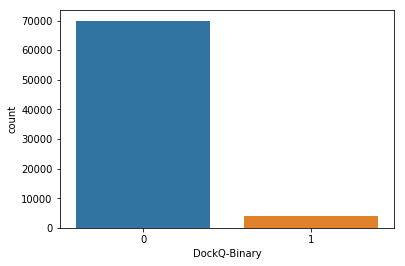

In [4]:
plt.clf()
sns.countplot(x="DockQ-Binary", data=train);
plt.show()


It is also possible to add a categorical column based on the binary score of dockQ for the protein-protein interaction.

In [5]:
import numpy as np
v = train["DockQ"].values
cats = np.array(['low', 'medium', 'high'])
min_cat = np.min(train.loc[(train['DockQ-Binary'] == 1)]['DockQ']) + np.std(train['DockQ'])
max_cat = np.max(train.loc[(train['DockQ-Binary'] == 1)]['DockQ']) - np.std(train['DockQ'])
code = np.searchsorted([min_cat, max_cat], v.ravel()).reshape(v.shape)
train['DockQ_cat'] = cats[code]
train.loc[(train['DockQ_cat'] == 'high')]

,Model,rGb,nBSA,Fintres,Sc,EC,ProQ,zrank,zrank2,Isc,...,Etmr,CPM,Ld,CPscore,DockQ,DockQ-Binary,ProQDock,ProQDockZ,cv,DockQ_cat
8552,T37-305,0.057,0.049,0.148,0.736,0.606,0.821,0.370,0.189,0.114,...,0.279,0.808,0.120,0.116,0.88594,1,0.526796,0.657898,3,high
9042,T37-853,0.051,0.050,0.148,0.664,0.634,0.828,0.332,0.139,1.000,...,0.294,0.871,0.118,0.114,0.85984,1,0.477635,0.540149,3,high
10297,T40-23,0.008,0.059,0.300,0.714,0.532,0.838,0.410,0.181,0.975,...,0.587,0.936,0.098,0.270,0.85265,1,0.856672,0.955222,2,high
10322,T40-48,0.012,0.056,0.296,0.632,0.364,0.833,0.467,0.523,1.000,...,0.397,0.808,0.100,0.278,0.94302,1,0.591641,0.486958,2,high
10324,T40-50,-0.001,0.043,0.251,0.750,0.757,0.806,0.422,0.349,0.241,...,0.566,0.625,0.107,0.226,0.87896,1,1.127876,1.212128,2,high
10330,T40-56,0.012,0.056,0.278,0.697,0.527,0.848,0.428,0.212,0.037,...,0.610,0.883,0.104,0.252,0.87395,1,0.695914,0.881600,2,high
10332,T40-58,-0.000,0.049,0.274,0.455,0.630,0.808,0.483,0.679,1.000,...,0.432,0.590,0.116,0.275,0.87155,1,0.920103,0.816118,2,high
10334,T40-60,0.006,0.059,0.296,0.686,0.546,0.847,0.427,0.200,0.182,...,0.553,0.883,0.090,0.246,0.89261,1,0.760959,0.983717,2,high
10337,T40-63,-0.003,0.043,0.256,0.764,0.449,0.823,0.417,0.323,0.365,...,0.550,0.857,0.117,0.220,0.90020,1,0.551306,0.657814,2,high
10358,T40-84,0.005,0.055,0.296,0.754,0.509,0.852,0.427,0.224,0.246,...,0.453,0.928,0.101,0.299,0.92329,1,0.560133,0.584260,2,high


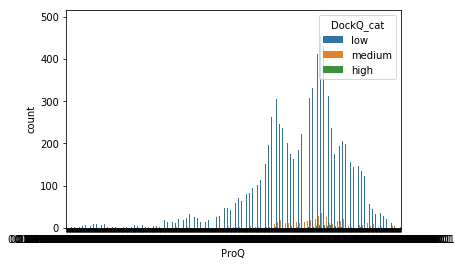

In [6]:
plt.clf()
sns.countplot(x="ProQ", hue='DockQ_cat', data=train);
plt.show()

It is possible as well to visualize the link between certain attributes and the DockQ score classes (either binary or the added categorical column). It will give us some insight regarding the similarity between the attributes and their capacity to describe the target score. A more advance study on the similarity on the attributes or the rows will be conducted in the next part.

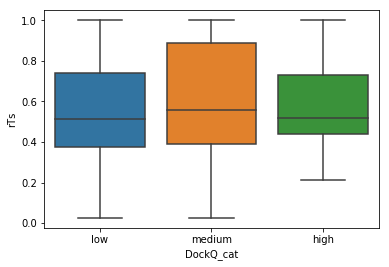

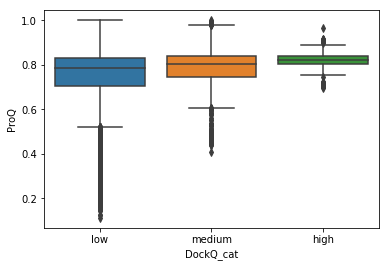

In [8]:
plt.clf()
sns.boxplot(x="DockQ_cat", y="rTs", data=train)
plt.show()
sns.boxplot(x="DockQ_cat", y="ProQ", data=train)
plt.show()

## 2 Clustering

As we performed it during the exercise session, we will cluster the data based on some of the attributes to analyse the similarity of the rows. Just as in the exercises, we have to scale the attributes using sklearn python module.

In [33]:
from sklearn import preprocessing

train['DockQ_cat'] = train['DockQ_cat'].astype('category')
cat_columns = train.select_dtypes(['category']).columns
train['DockQ_cat-int'] = train[cat_columns].apply(lambda x: x.cat.codes)

trainable_cols=["rGb","nBSA","Fintres","Sc","EC","ProQ","Isc","rTs","Erep","Etmr","CPM","Ld", "CPscore"]
trainable_cols_target=trainable_cols + ["DockQ-Binary"] + ["DockQ_cat-int"]
train_target=train[trainable_cols_target].dropna()
df=train_target[trainable_cols]

pd.options.mode.chained_assignment = None  # default='warn'

scaling=True
if scaling:
    min_max_scaler = preprocessing.MinMaxScaler()
    columns_to_scale=trainable_cols
    df.loc[:,columns_to_scale]=min_max_scaler.fit_transform(df[columns_to_scale].values)

Once the data are normalized and using the module sklearn, we will apply PrincipalComponent Analysis clustering on our dataset. Once computed, the components will be plotted.

In [34]:
from sklearn.decomposition import PCA

pca=PCA(n_components=5)
X = pca.fit(df.values).transform(df.values)
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))
print(np.sum(pca.explained_variance_ratio_[0:3]))
print(df.shape)
train_target['PC1']=X[:,0]
train_target['PC2']=X[:,1]
train_target['PC3']=X[:,2]
train_target['PC4']=X[:,3]
train_target['PC5']=X[:,4]
print (pca.components_)
df.columns

explained variance ratio: [0.41745529 0.20978048 0.12164017 0.07557945 0.06232168]
0.7488759383296755
(73789, 13)
[[-0.00374763 -0.02858294 -0.05922698 -0.18538819 -0.06827822 -0.09869298
   0.67089074  0.47226253  0.3884008   0.15725463 -0.31310572  0.01101119
  -0.00481878]
 [-0.01915935  0.05414057  0.06885     0.02618219  0.07510112 -0.1322844
  -0.5587904   0.56693507  0.09489171  0.56777336  0.05199549 -0.0165276
   0.01125764]
 [-0.00912357  0.14445139  0.17199819 -0.25242131 -0.22214998  0.00217774
  -0.42510317 -0.03104567  0.25205552 -0.36215537 -0.67681765 -0.04404686
  -0.00282973]
 [-0.0295906   0.21537207  0.39196438  0.08642008 -0.42491739 -0.18265192
   0.19359791 -0.16219594 -0.5246276   0.40494197 -0.2724514  -0.01827164
   0.01244329]
 [-0.03635431  0.43310545  0.67044487  0.10702555  0.43294955 -0.17864764
   0.11965255  0.02991242  0.20193073 -0.19228325  0.18595182 -0.05680988
   0.00459985]]


Index(['rGb', 'nBSA', 'Fintres', 'Sc', 'EC', 'ProQ', 'Isc', 'rTs', 'Erep',
       'Etmr', 'CPM', 'Ld', 'CPscore'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

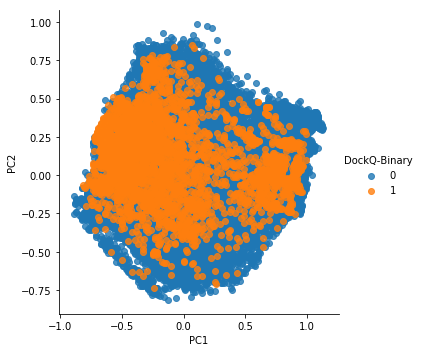

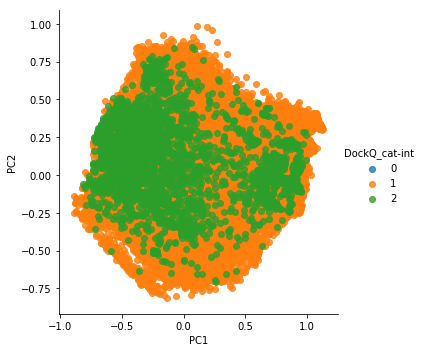

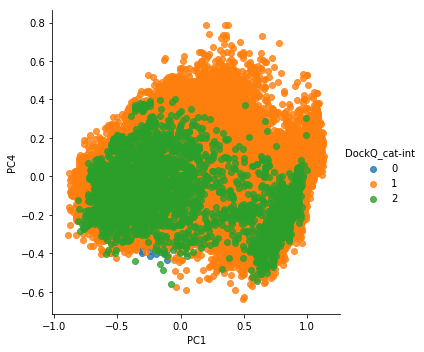

In [36]:
plt.clf()
sns.lmplot(x='PC1',y='PC2',hue='DockQ-Binary',data=train_target,fit_reg=False)
plt.show()
sns.lmplot(x='PC1',y='PC2',hue='DockQ_cat-int',data=train_target,fit_reg=False)
plt.show()
sns.lmplot(x='PC1',y='PC4',hue='DockQ_cat-int',data=train_target,fit_reg=False)
plt.show()

## 3 Supervised learning

After visualizing and understanding the data, we will train different machine learning methods to predict the DockQ binary score or the DockQ categories we introduced in the previous sections.

### Cross validation
Here we will divide our dataset into subset used to test our supervised learning methods. Five-fold cross validation has been done for the ProQDock dataset. The division of subset has been conducted so that there is no homologous proteins between the substes.Each subset was built so that the number of models in each is similar.

In [37]:
print(train["cv"].value_counts())

5    15798
2    15365
1    14509
4    14492
3    13625
Name: cv, dtype: int64


### Scaling the dataset and preparing the training

Before implementing the training of our machine learning methods we will scale the features of our dataset betwee 0 and 1. At first we will chose to scale all the 13 feature columns of our dataset.

In [39]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

train_columns = trainable_cols + ["DockQ-Binary", "cv"]

train_data=train[train_columns].dropna()

scaling=True
if scaling:
    columns_to_scale=trainable_cols 
    # Fit the scaler on the training data
    min_max_scaler.fit(train_data[columns_to_scale].values)
    # Transform the scaling to the train_data
    train_data.loc[:,columns_to_scale]=min_max_scaler.transform(train_data[columns_to_scale].values)

#train_data

,rGb,nBSA,Fintres,Sc,EC,ProQ,Isc,rTs,Erep,Etmr,CPM,Ld,CPscore,DockQ-Binary,cv
0,0.926589,0.175258,0.167192,0.603594,0.580715,0.641892,1.000,0.992821,0.997817,0.375000,0.723,0.114,0.114079,0,5
1,0.924799,0.185567,0.195584,0.612051,0.472373,0.665541,1.000,0.995897,0.997817,0.465625,0.695,0.088,0.107679,0,5
2,0.932856,0.139175,0.138801,0.820296,0.776815,0.659910,0.464,0.393846,0.575328,0.317708,0.857,0.146,0.122983,0,5
3,0.923903,0.164948,0.186120,0.543340,0.789816,0.594595,0.490,0.889231,0.351528,0.907292,0.735,0.101,0.113523,0,5
4,0.931065,0.149485,0.160883,0.355180,0.634886,0.671171,1.000,1.000000,1.000000,0.394792,0.451,0.097,0.107958,0,5
5,0.936437,0.154639,0.164038,0.396406,0.496208,0.673423,1.000,1.000000,1.000000,0.392708,0.372,0.112,0.150529,1,5
6,0.933751,0.139175,0.141956,0.636364,0.774106,0.713964,0.784,0.471795,0.614629,0.355208,0.799,0.122,0.110740,1,5
7,0.931961,0.072165,0.091483,0.607822,0.569339,0.679054,1.000,1.000000,1.000000,0.396875,0.723,0.165,0.108792,0,5
8,0.931961,0.190722,0.167192,0.398520,0.386241,0.643018,1.000,1.000000,1.000000,0.469792,0.289,0.098,0.116027,0,5
9,0.935542,0.103093,0.129338,0.583510,0.576923,0.677928,0.527,0.955897,0.980349,0.389583,0.723,0.134,0.160545,0,5


To be used to train machine learning methods we will create a numpy matrix X for the training data and a vector Y for the target values. As done in the course exercise, we will use the predefined cross-validation splits form the sklearn module.

In [40]:
from sklearn.model_selection import PredefinedSplit
(size_x,size_y)=train_data.shape
target_index=size_y-2
cv_index=size_y-1

# Build the X matrix from the training dataset
X=train_data[trainable_cols].values

# Build the Y vector for the target
Y=train_data['DockQ-Binary'].values

cv = PredefinedSplit(train_data['cv'].values)

### Machine Learning methods training
Just like in the course exercises, we will now test several machine learning methods on our prepared dataset.

#### Random Forest Classifier
The first method is the random forest classifier. We will firstly have a look into the choice of hyperparameters. 

From sklearn module we get the definitions for the different hyperparameters:
1. n_estimators: The number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.

2. max_depth: The maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.

3. min_samples_split: The minimum number of samples required to split an internal leaf node. The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.

4. min_samples_leaf: The minimum number of samples required to be at a leaf node. The default value for this parameter is 1, which means that every leaf must have at least 1 sample that it classifies.

Here we run a benchmark on the different hyperparameters wiht the previous cross validation. Please note that, given the size of the dataset, the computation is probably too long to be ran here, and has been run on a Colab notebook (please see https://colab.research.google.com/drive/1Cm9yBDI1j9KQxuio3DC95c8wDI6iX_qC)

In [43]:
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

    
train_scoreNum, test_scoreNum = validation_curve(
                            RandomForestClassifier(),
                            X = X, y = Y, 
                            param_name = 'n_estimators', 
                            param_range = [100, 300, 500, 700, 800, 1200], cv = cv.split())
print(train_scoreNum)
print(test_scoreNum)



[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0.98118409 0.87829483 0.95500917 0.95756279 0.96410938]
 [0.98132194 0.87862024 0.95508257 0.95707977 0.96404608]
 [0.98145978 0.87849007 0.95530275 0.95707977 0.96391948]
 [0.98159763 0.87855516 0.95530275 0.95735578 0.96404608]
 [0.98152871 0.87855516 0.95508257 0.95707977 0.96410938]
 [0.98132194 0.87855516 0.95522936 0.95721778 0.96385618]]


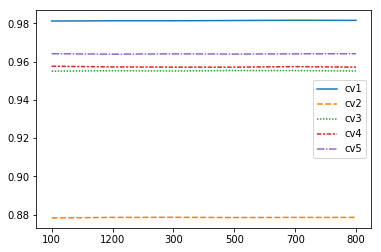

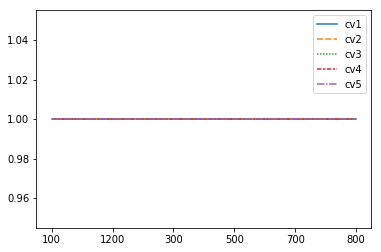

In [57]:
df = pd.DataFrame(data=test_scoreNum,    # values
              index=['100', '300', '500', '700', '800', '1200'],    # 1st column as index
              columns=['cv1','cv2','cv3','cv4','cv5']) 
ax = sns.lineplot(data=df)
plt.show()
df2 = pd.DataFrame(data=train_scoreNum,    # values
              index=['100', '300', '500', '700', '800', '1200'],    # 1st column as index
              columns=['cv1','cv2','cv3','cv4','cv5']) 
ax2 = sns.lineplot(data=df2)
plt.show()

We ran all the mentionned hyperparameter (see Colab notebook) and obtaind the following curves:
On generated test, followed by train dataset, for the max_depth hyperparameter, we can see the trend at 20 which stabilizes, we will use this hyperparamter.

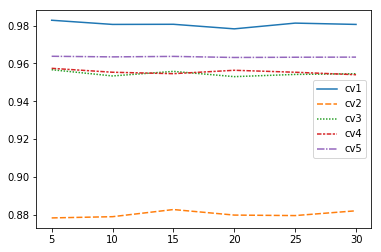

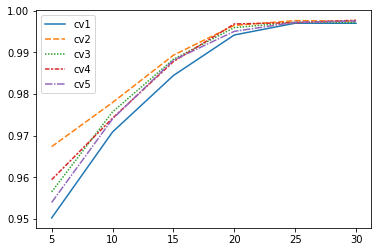

On generated test, followed by train dataset, for the min_samples_split hyperparameter, we will use 5 here for this hyperparamter.

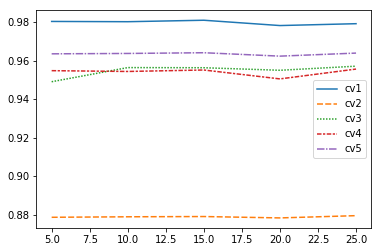

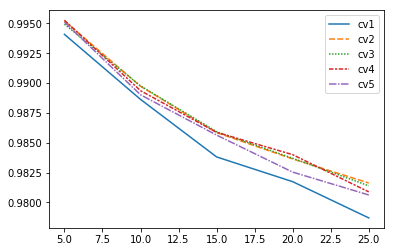

On generated test, followed by train dataset, for the min_samples_leaf hyperparameter, we will use 2 here for this hyperparamter.

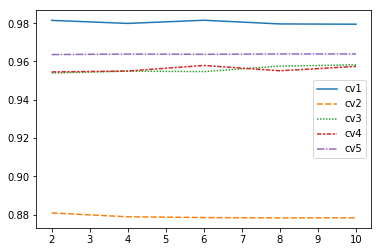

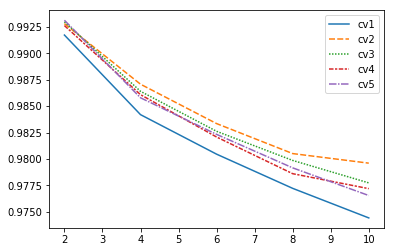

##### Running the Random Forest Classifier with the correct choice of hyperparameters
Based on the previous benchmark we will run the RFC with the chosen hyperparamters and using the example provided in the course exercises.

In [58]:
clf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=None, verbose=0)


Set:  1
Training on 59280 examples
Testing on 14509 examples
Training performance f1 0.9111945905334334 acc 0.9900303643724696 mcc 0.9099075237811507
Validation performance f1 0.0 acc 0.9820800882211042 mcc -0.004927111525043912
Set:  2
Training on 58424 examples
Testing on 15365 examples


/Users/pierrebedoucha/miniconda3/envs/medbioinfo-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/pierrebedoucha/miniconda3/envs/medbioinfo-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Training performance f1 0.8567327016939421 acc 0.9914589894563878 mcc 0.8617834062648321
Validation performance f1 0.0 acc 0.8783599088838269 mcc 0.0
Set:  3
Training on 60164 examples
Testing on 13625 examples
Training performance f1 0.9123677248677249 acc 0.9911907452961904 mcc 0.9116534035364939
Validation performance f1 0.042071197411003236 acc 0.9565504587155963 mcc 0.06800830286330624
Set:  4
Training on 59297 examples
Testing on 14492 examples
Training performance f1 0.9193762441937624 acc 0.9918039698467038 mcc 0.9182412218892749
Validation performance f1 0.06422018348623854 acc 0.9577698040298096 mcc 0.11668624293571433
Set:  5
Training on 57991 examples
Testing on 15798 examples
Training performance f1 0.9153605015673981 acc 0.9911537997275439 mcc 0.9143507373335625
Validation performance f1 0.023972602739726026 acc 0.9639194834789214 mcc 0.08472496687344958
Overall Validation Performance f1 0.0205771643663739 acc 0.9471059371993116 mcc 0.050734483587430726


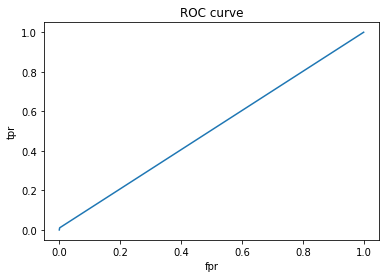

In [69]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

pred_save=[]
true_save=[]
pred_prob_save=[]

for i, (train_index, val_index) in enumerate(cv.split(),1):
    print("Set: ",i)
    print("Training on",len(train_index),"examples")
    print("Testing on",len(val_index),"examples")
    (X_train, X_val) = X[train_index,:], X[val_index,:]
    (Y_train, Y_val) = Y[train_index], Y[val_index]

    clf=clf.fit(X_train,Y_train)

    #Predict on the training data    
    pred=clf.predict(X_train)
    #Calculate performance measures on the validation data   
    acc_train=accuracy_score(pred,Y_train)
    mcc_train=matthews_corrcoef(pred,Y_train)
    f1_train=f1_score(pred,Y_train)
    
    #Predict on the validation data
    val_pred=clf.predict(X_val)
    #Predict the probability (to use the roc-plot later)
    val_pred_prob=val_pred
    
    #Save the values to have predictions for all folds.
    pred_save.append(val_pred)
    pred_prob_save.append(val_pred_prob)
    true_save.append(Y_val)
    #Calculate performance measures on the validation data
    acc=accuracy_score(val_pred,Y_val)
    mcc=matthews_corrcoef(val_pred,Y_val)
    f1=f1_score(val_pred,Y_val)
    
    print("Training performance","f1",f1_train,"acc",acc_train,"mcc",mcc_train)
    print("Validation performance","f1",f1,"acc",acc,"mcc",mcc)
    print("==============")
    
    
    
#Calculate overall validation performance
predictions=np.concatenate(pred_save)
correct=np.concatenate(true_save)
predicted_prob=np.concatenate(pred_prob_save)
acc=accuracy_score(predictions,correct)
mcc=matthews_corrcoef(predictions,correct)
f1=f1_score(predictions,correct)
print("==============")
print("Overall Validation Performance","f1",f1,"acc",acc,"mcc",mcc)
print("==============")

pred_save=np.concatenate(pred_save)
true_save=np.concatenate(true_save)
pred_prob_save=np.concatenate(pred_prob_save)
(fpr,tpr,thres_roc)=roc_curve(true_save,pred_prob_save)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('fpr')
plt.ylabel('tpr')

#print(legend_text)
#plt.legend(legend_text)
plt.show()

Here we have a overall f1 score (precision and recall) of 0.03. It's very low value, meaning that our model have issues with false positive or false negative. The overall accuracy score is 0.94 and represents the fraction of correctly predicted samples. Finally, mcc score, representing a correlation score to measure the quality of binary classification, is 0.06 which is also a low value and show issues with our model.
The ROC Curve shows that our model failed in predicting the DockQ-Binary score of the samples.

As done in the course exercise, we can try to cycle through the features to check if it can increase the performance.

In [70]:
#Some dictionaries to store cross-validated predictions
predictions={}
correct={}
predicted_prob={}

pred_save=[]
true_save=[]
pred_prob_save=[]
legend_text=[]

for feat_stop in range(0,X.shape[1]+1):
    name="-".join(trainable_cols[0:feat_stop+1])
    legend_text.append(name)
    pred_save=[]
    true_save=[]
    pred_prob_save=[]
    for i, (train_index, val_index) in enumerate(cv.split(),1):
        (X_train, X_val) = X[train_index,0:feat_stop+1], X[val_index,0:feat_stop+1]
        (Y_train, Y_val) = Y[train_index], Y[val_index]
        clf=clf.fit(X_train,Y_train)

    #Predict on the training data    
        pred=clf.predict(X_train)
    #Calculate performance measures on the validation data   
        acc_train=accuracy_score(pred,Y_train)
        mcc_train=matthews_corrcoef(pred,Y_train)
        f1_train=f1_score(pred,Y_train)
    
    #Predict on the validation data
        val_pred=clf.predict(X_val)
    #Predict the probability (to use the roc-plot later)
        val_pred_prob=clf.predict_proba(X_val)
    #Save the values to have predictions for all folds.
        pred_save.append(val_pred)
        pred_prob_save.append(val_pred_prob)
        true_save.append(Y_val)
    #Calculate performance measures on the validation data
        acc=accuracy_score(val_pred,Y_val)
        mcc=matthews_corrcoef(val_pred,Y_val)
        f1=f1_score(val_pred,Y_val)

        
#Calculate overall validation performance
    predictions[name]=np.concatenate(pred_save)
    correct[name]=np.concatenate(true_save)
    predicted_prob[name]=np.concatenate(pred_prob_save)
    acc=accuracy_score(predictions[name],correct[name])
    mcc=matthews_corrcoef(predictions[name],correct[name])
    f1=f1_score(predictions[name],correct[name])
    print("==============")
    print("Training on", name)
    print("Overall Validation Performance","f1",f1,"acc",acc,"mcc",mcc)
    print("==============")

/Users/pierrebedoucha/miniconda3/envs/medbioinfo-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/pierrebedoucha/miniconda3/envs/medbioinfo-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/pierrebedoucha/miniconda3/envs/medbioinfo-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/pierrebedoucha/miniconda3/envs/medbioinfo-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/pierrebedoucha/miniconda3/envs/me

Training on rGb
Overall Validation Performance f1 0.007958219348420791 acc 0.9459404518288633 mcc 0.009790666732847092
Training on rGb-nBSA
Overall Validation Performance f1 0.06065934065934066 acc 0.94207808751982 mcc 0.06437895643819405
Training on rGb-nBSA-Fintres
Overall Validation Performance f1 0.026309820821047856 acc 0.9418205965658838 mcc 0.020691465830183324
Training on rGb-nBSA-Fintres-Sc
Overall Validation Performance f1 0.025339366515837104 acc 0.9416173142338289 mcc 0.018684354995631015
Training on rGb-nBSA-Fintres-Sc-EC
Overall Validation Performance f1 0.06992022524636321 acc 0.9462792557156215 mcc 0.10566115873227981
Training on rGb-nBSA-Fintres-Sc-EC-ProQ
Overall Validation Performance f1 0.053562888570062174 acc 0.9463605686484435 mcc 0.08769891986480653
Training on rGb-nBSA-Fintres-Sc-EC-ProQ-Isc
Overall Validation Performance f1 0.04927536231884059 acc 0.9466587160687907 mcc 0.08628549163121257
Training on rGb-nBSA-Fintres-Sc-EC-ProQ-Isc-rTs
Overall Validation Perf

[('rGb', array([0, 0, 0, ..., 0, 0, 0])), ('rGb-nBSA', array([0, 0, 0, ..., 0, 0, 0])), ('rGb-nBSA-Fintres', array([0, 0, 0, ..., 0, 0, 0])), ('rGb-nBSA-Fintres-Sc', array([0, 0, 0, ..., 0, 0, 0])), ('rGb-nBSA-Fintres-Sc-EC', array([0, 0, 0, ..., 0, 0, 0])), ('rGb-nBSA-Fintres-Sc-EC-ProQ', array([0, 0, 0, ..., 0, 0, 0])), ('rGb-nBSA-Fintres-Sc-EC-ProQ-Isc', array([0, 0, 0, ..., 0, 0, 0])), ('rGb-nBSA-Fintres-Sc-EC-ProQ-Isc-rTs', array([0, 0, 0, ..., 0, 0, 0])), ('rGb-nBSA-Fintres-Sc-EC-ProQ-Isc-rTs-Erep', array([0, 0, 0, ..., 0, 0, 0])), ('rGb-nBSA-Fintres-Sc-EC-ProQ-Isc-rTs-Erep-Etmr', array([0, 0, 0, ..., 0, 0, 0])), ('rGb-nBSA-Fintres-Sc-EC-ProQ-Isc-rTs-Erep-Etmr-CPM', array([0, 0, 0, ..., 0, 0, 0])), ('rGb-nBSA-Fintres-Sc-EC-ProQ-Isc-rTs-Erep-Etmr-CPM-Ld', array([0, 0, 0, ..., 0, 0, 0])), ('rGb-nBSA-Fintres-Sc-EC-ProQ-Isc-rTs-Erep-Etmr-CPM-Ld-CPscore', array([0, 0, 0, ..., 0, 0, 0]))]


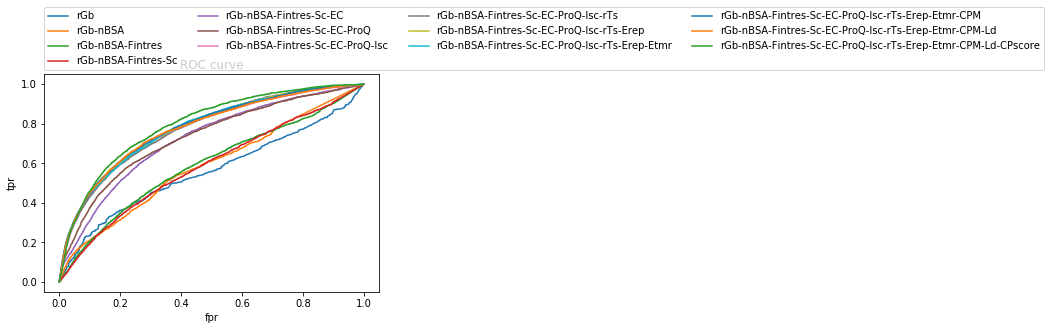

In [71]:
plt.clf()

legend_text=[]
pred_sorted=sorted(predictions.items(), key=lambda kv: (len(kv[1]), kv[0]))
print(pred_sorted)


for (name,value) in pred_sorted:
    #print key, value
    #continue
    legend_text.append(name)
    acc=accuracy_score(predictions[name],correct[name])
    mcc=matthews_corrcoef(predictions[name],correct[name])
    f1=f1_score(predictions[name],correct[name])
    #(prec,recall,thres)=precision_recall_curve(true_save,pred_prob_save[:,1])
    (fpr,tpr,thres_roc)=roc_curve(correct[name],predicted_prob[name][:,1])
    plt.plot(fpr,tpr)
    plt.title('ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
      
    plt.savefig('RF.png',dpi=300)
plt.legend(legend_text, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=4, borderaxespad=0.)#mode="expand"  
plt.show()

[0.11153048 0.05862412 0.09908327 0.03841321 0.164811   0.09266187
 0.06735566 0.05605479 0.07268612 0.06731582 0.03932764 0.04926531
 0.0828707 ]
Feature ranking:
1. feature 4 (0.164811)
2. feature 0 (0.111530)
3. feature 2 (0.099083)
4. feature 5 (0.092662)
5. feature 12 (0.082871)
6. feature 8 (0.072686)
7. feature 6 (0.067356)
8. feature 9 (0.067316)
9. feature 1 (0.058624)
10. feature 7 (0.056055)
11. feature 11 (0.049265)
12. feature 10 (0.039328)
13. feature 3 (0.038413)


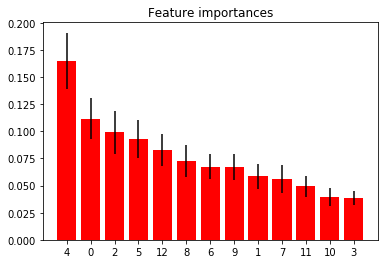

In [72]:
print(clf.feature_importances_)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [ ]:
trainable_cols.append("DockQ-Binary")
trainable_cols.append("cv")

print(trainable_cols)


data=train[trainable_cols].dropna().values.astype(float)
print(data.shape[1])
(size_x,size_y)=data.shape
X=data[:,0:size_y-2]
Y=data[:,size_y-2]
CV_splits=data[:,size_y-1]
print(X)
corr=np.corrcoef(data)

for i,name in enumerate(trainable_cols):
#    c=matthews_corrcoef(data[:,i],data[:,size_y-1])
    print(i,name,corr[i,size_y-1])
    